# Analysis of TRM output

This notebook looks at the output generated in `Drivers_of_offline_Tchange.ipynb`. So far some patterns are that:

1. this reconstruction works reasonably well for <=60 latitude (I think because of my filtering procedure)
1. zsno (6-7), upplim_destruct_metamorph both don't look good over ice sheets
1. confusingly, the script broke...?

# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

In [3]:
from load_gridcell_areas import *
landarea_not60=landarea.where(landarea.lat<=60).where(landarea.lat>-60)
landweights_not60=landarea_not60/landarea_not60.mean(dim=['lat','lon'])

In [4]:
from load_ensembles import *

In [5]:
import make_multisimulation_dataset

In [6]:
#var_array_pval = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)

# Look at all ensemble members

In [7]:
input_dir='/glade/work/czarakas/Lague_kernels/TRM/'

In [8]:
key_short='OFFL0001'
key=key_short+'_PI_v02'
offline_key_list=crosswalk.key_landonlyPPE.values
keys=offline_key_list
delta_Rnet_avg=xr.open_dataset(input_dir+'delta_Rnet_avg.'+key+'.nc')

deltas_Rnet = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
deltas_ra_avg = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
deltas_rs_avg = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
deltas_Ts_avg = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
dTs_Rnet_avgs = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
dTs_ra_avgs = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
dTs_rs_avgs = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
dTs_est_avgs = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
dTs_actual_avgs = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)
error_avgs = make_multisimulation_dataset.make_empty_dataarray(ds_grid=delta_Rnet_avg.expand_dims('time',0), 
                                                                   var='delta_Rnet_avg', keys=keys)

In [9]:
crosswalk

,key_CLM5PPE,param,minmax,include,parameter domain,parameter category,parameter description,key_coupledPPE,key_landonlyPPE,notes,Key_short,description
1,OAAT0013,rhosnir,min,yes,Vegetation,Plant optical properties,Stem reflectance: near-IR,COUP0001,OFFL0001,NaN,0001,"rhosnir, min"
2,OAAT0014,rhosnir,max,yes,Vegetation,Plant optical properties,Stem reflectance: near-IR,COUP0037,OFFL0002,COUP0037 was run with an extremely small pertu...,0037,"rhosnir, max"
3,OAAT0035,d_max,min,yes,Soil and surface water,Soil and surface water hydrology,Dry surface layer (DSL) parameter,COUP0007,OFFL0007,NaN,0007,"d_max, min"
4,OAAT0036,d_max,max,yes,Soil and surface water,Soil and surface water hydrology,Dry surface layer (DSL) parameter,COUP0008,OFFL0008,NaN,0008,"d_max, max"
5,OAAT0037,frac_sat_soil_dsl_init,min,yes,Soil and surface water,Soil and surface water hydrology,Fraction of saturated soil for moisture value ...,COUP0009,OFFL0009,NaN,0009,"frac_sat_soil_dsl_init, min"
6,OAAT0038,frac_sat_soil_dsl_init,max,yes,Soil and surface water,Soil and surface water hydrology,Fraction of saturated soil for moisture value ...,COUP0010,OFFL0010,NaN,0010,"frac_sat_soil_dsl_init, max"
7,OAAT0072,maximum_leaf_wetted_fraction,min,yes,Vegetation,Canopy hydrology/canopy evaporation,Maximum fraction of leaf that may be wet prior...,COUP0013,OFFL0013,NaN,0013,"maximum_leaf_wetted_fraction, min"
8,OAAT0073,maximum_leaf_wetted_fraction,max,yes,Vegetation,Canopy hydrology/canopy evaporation,Maximum fraction of leaf that may be wet prior...,COUP0014,OFFL0014,NaN,0014,"maximum_leaf_wetted_fraction, max"
9,OAAT0076,fff,min,yes,Soil and surface water,Soil and surface water hydrology,Decay factor for fractional saturated area,COUP0015,OFFL0015,NaN,0015,"fff, min"
10,OAAT0077,fff,max,yes,Soil and surface water,Soil and surface water hydrology,Decay factor for fractional saturated area,COUP0016,OFFL0016,NaN,0016,"fff, max"


In [10]:
offline_key_list

array(['OFFL0001', 'OFFL0002', 'OFFL0007', 'OFFL0008', 'OFFL0009',
       'OFFL0010', 'OFFL0013', 'OFFL0014', 'OFFL0015', 'OFFL0016',
       'OFFL0017', 'OFFL0018', 'OFFL0019', 'OFFL0020', 'OFFL0021',
       'OFFL0022', 'OFFL0023', 'OFFL0024', 'OFFL0025', 'OFFL0026',
       'OFFL0027', 'OFFL0028', 'OFFL0029', 'OFFL0030', 'OFFL0031',
       'OFFL0032', 'OFFL0033', 'OFFL0034', 'OFFL0035', 'OFFL0036',
       'OFFL0003', 'OFFL0004', 'OFFL0005', 'OFFL0006', 'OFFL0011',
       'OFFL0012'], dtype=object)

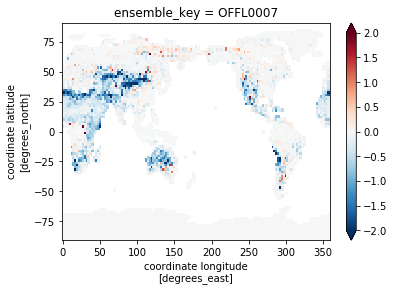

In [36]:
deltas_Rnet[:,:,2].plot(vmax=2)

In [9]:
for i,key_short in enumerate(offline_key_list):
    key=key_short+'_PI_v02'
    desc=(crosswalk.description.values[(crosswalk.key_landonlyPPE.values==key_short)])[0]
    print(desc)

    delta_Rnet_avg=xr.open_dataset(input_dir+'delta_Rnet_avg.'+key+'.nc')['delta_Rnet_avg']
    delta_ra_avg=xr.open_dataset(input_dir+'delta_ra_avg.'+key+'.nc')['delta_ra_avg']
    delta_rs_avg=xr.open_dataset(input_dir+'delta_rs_avg.'+key+'.nc')['delta_rs_avg']
    delta_Ts_avg=xr.open_dataset(input_dir+'delta_Ts_avg.'+key+'.nc')['delta_Ts_avg']
    dTs_Rnet_avg=xr.open_dataset(input_dir+'dTs_Rnet_avg.'+key+'.nc')['dTs_Rnet_avg']
    dTs_ra_avg=xr.open_dataset(input_dir+'dTs_ra_avg.'+key+'.nc')['dTs_ra_avg']
    dTs_rs_avg=xr.open_dataset(input_dir+'dTs_rs_avg.'+key+'.nc')['dTs_rs_avg']
    dTs_est_avg=xr.open_dataset(input_dir+'dTs_est_avg.'+key+'.nc')['dTs_est_avg']
    dTs_actual_avg=xr.open_dataset(input_dir+'dTs_actual_avg.'+key+'.nc')['dTs_actual_avg']
    error_avg=xr.open_dataset(input_dir+'error_avg.'+key+'.nc')['error_avg']
    
    deltas_Rnet[:,:,i]=delta_Rnet_avg
    deltas_ra_avg[:,:,i]=delta_ra_avg
    deltas_rs_avg[:,:,i]=delta_rs_avg
    deltas_Ts_avg[:,:,i]=delta_Ts_avg
    dTs_Rnet_avgs[:,:,i]=dTs_Rnet_avg
    dTs_ra_avgs[:,:,i]=dTs_ra_avg
    dTs_rs_avgs[:,:,i]=dTs_rs_avg
    dTs_est_avgs[:,:,i]=dTs_est_avg
    dTs_actual_avgs[:,:,i]=dTs_actual_avg
    error_avgs[:,:,i]=error_avg

rhosnir, min
rhosnir, max
d_max, min
d_max, max
frac_sat_soil_dsl_init, min
frac_sat_soil_dsl_init, max
maximum_leaf_wetted_fraction, min
maximum_leaf_wetted_fraction, max
fff, min
fff, max
upplim_destruct_metamorph, min
upplim_destruct_metamorph, max
medlynslope, max
medlynintercept, min
tpu25ratio, min
tpu25ratio, max
jmaxb0, max
jmaxb1, min
jmaxb1, max
kmax, min
kmax, max
nstem, min
nstem, max
lmrha, min
lmrha, max
medlynslope, min
jmaxb0, min
medlynintercept, max
sand_pf, min
sand_pf, max
z0mr, min
z0mr, max
zsno, min
zsno, max
zetamaxstable, min
zetamaxstable, max


# Quantify magnitude of error

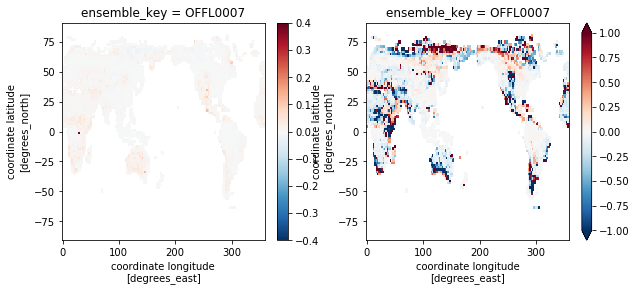

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
(error_avgs)[:,:,2].plot(vmax=0.4)
plt.subplot(1,2,2)
(error_avgs/dTs_actual_avgs)[:,:,2].plot(vmax=1)

# Figure of land average

In [11]:
crosswalk['dTs_Rnet_avgs']=(dTs_Rnet_avgs*landweights_not60).mean(dim=['lat','lon']).values
crosswalk['dTs_ra_avgs']=(dTs_ra_avgs*landweights_not60).mean(dim=['lat','lon']).values
crosswalk['dTs_rs_avgs']=(dTs_rs_avgs*landweights_not60).mean(dim=['lat','lon']).values
crosswalk['dTs_est_avgs']=(dTs_est_avgs*landweights_not60).mean(dim=['lat','lon']).values
crosswalk['dTs_actual_avgs']=(dTs_actual_avgs*landweights_not60).mean(dim=['lat','lon']).values
crosswalk['error_avgs']=(error_avgs*landweights_not60).mean(dim=['lat','lon']).values

In [15]:
crosswalk['dTs_actual_abs']=np.abs(crosswalk['dTs_actual_avgs'])
crosswalk_sorted=crosswalk.sort_values(by=['dTs_actual_abs'], ascending = False)

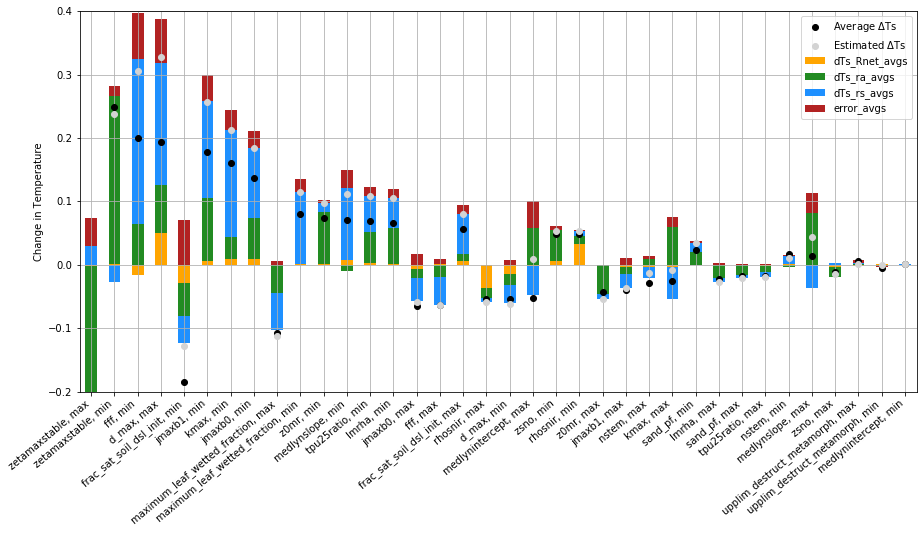

In [17]:
#plt.figure()
crosswalk_sorted[['dTs_Rnet_avgs', 
           'dTs_ra_avgs',
           'dTs_rs_avgs',
           'error_avgs']].plot.bar(stacked=True,
                                  colors=['orange','forestgreen','dodgerblue','firebrick'],
                                  label=crosswalk_sorted.description.values,
                                  figsize=(15,7))
plt.plot(np.arange(0,36),crosswalk_sorted.dTs_actual_avgs,'ok', label='Average $\Delta$Ts')
plt.plot(np.arange(0,36),crosswalk_sorted.dTs_est_avgs,'o',color='lightgray', label='Estimated $\Delta$Ts')
plt.ylabel('Change in Temperature')# facecolor='none')
plt.xticks(rotation=40, ha='right', ticks=np.arange(1,37)-1,
           labels=crosswalk_sorted.description.values)
plt.grid()
plt.ylim([-0.2, 0.4])
plt.legend()

In [60]:
yvar=dTs_actual_avgs
y_pred=dTs_est_avgs


SST = ((yvar[:,:,:-2] - yvar[:,:,:-2].mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
SSReg = ((y_pred[:,:,:-2] - yvar[:,:,:-2].mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared = SSReg/SST

SSReg1 = ((dTs_rs_avgs[:,:,:-2] - yvar[:,:,:-2].mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared1 = SSReg1/SST

SSReg2 = ((dTs_Rnet_avgs[:,:,:-2] - yvar[:,:,:-2].mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared2 = SSReg2/SST

SSReg3 = ((dTs_ra_avgs[:,:,:-2] - yvar[:,:,:-2].mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared3 = SSReg3/SST

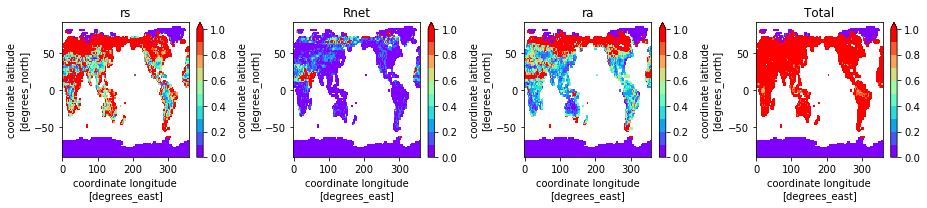

In [61]:
plt.figure(figsize=(13,3))
plt.subplot(1,4,1)
Rsquared1.plot(cmap=plt.cm.get_cmap("rainbow",10), vmin=0, vmax=1)
plt.title('rs')
plt.subplot(1,4,2)
Rsquared2.plot(cmap=plt.cm.get_cmap("rainbow",10), vmin=0, vmax=1)
plt.title('Rnet')
plt.subplot(1,4,3)
Rsquared3.plot(cmap=plt.cm.get_cmap("rainbow",10), vmin=0, vmax=1)
plt.title('ra')
plt.subplot(1,4,4)
Rsquared.plot(cmap=plt.cm.get_cmap("rainbow",10), vmin=0, vmax=1)
plt.title('Total')
plt.tight_layout()

In [ ]:
SST = ((yvar - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
SSReg = ((y_pred - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared = SSReg[0:-2]/SST[0:-2]

SSReg1 = ((y_pred_var1 - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared1 = SSReg1[0:-2]/SST[0:-2]

SSReg2 = ((y_pred_var2 - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared2 = SSReg2[0:-2]/SST[0:-2]

SSReg3 = ((y_pred_var3 - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared3 = SSReg3[0:-2]/SST[0:-2]

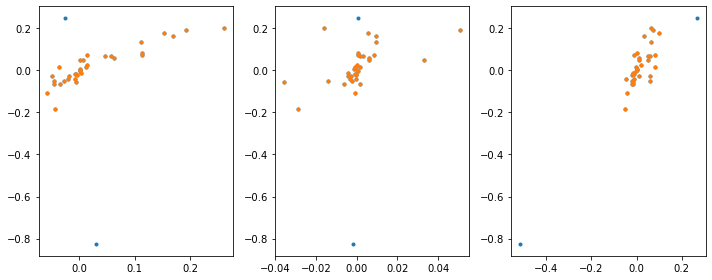

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(crosswalk_sorted.dTs_rs_avgs.values, crosswalk_sorted.dTs_actual_avgs.values,'.')
plt.plot(crosswalk_sorted.dTs_rs_avgs.values[2:], crosswalk_sorted.dTs_actual_avgs.values[2:],'.')

plt.subplot(1,3,2)
plt.plot(crosswalk_sorted.dTs_Rnet_avgs.values, crosswalk_sorted.dTs_actual_avgs.values,'.')
plt.plot(crosswalk_sorted.dTs_Rnet_avgs.values[2:], crosswalk_sorted.dTs_actual_avgs.values[2:],'.')

plt.subplot(1,3,3)
plt.plot(crosswalk_sorted.dTs_ra_avgs.values, crosswalk_sorted.dTs_actual_avgs.values,'.')
plt.plot(crosswalk_sorted.dTs_ra_avgs.values[2:], crosswalk_sorted.dTs_actual_avgs.values[2:],'.')

plt.tight_layout()

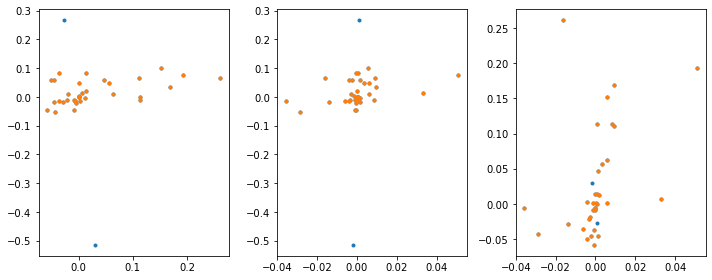

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(crosswalk_sorted.dTs_rs_avgs.values, crosswalk_sorted.dTs_ra_avgs.values,'.')
plt.plot(crosswalk_sorted.dTs_rs_avgs.values[2:], crosswalk_sorted.dTs_ra_avgs.values[2:],'.')

plt.subplot(1,3,2)
plt.plot(crosswalk_sorted.dTs_Rnet_avgs.values, crosswalk_sorted.dTs_ra_avgs.values,'.')
plt.plot(crosswalk_sorted.dTs_Rnet_avgs.values[2:], crosswalk_sorted.dTs_ra_avgs.values[2:],'.')

plt.subplot(1,3,3)
plt.plot(crosswalk_sorted.dTs_Rnet_avgs.values, crosswalk_sorted.dTs_rs_avgs.values,'.')
plt.plot(crosswalk_sorted.dTs_Rnet_avgs.values[2:], crosswalk_sorted.dTs_rs_avgs.values[2:],'.')

plt.tight_layout()

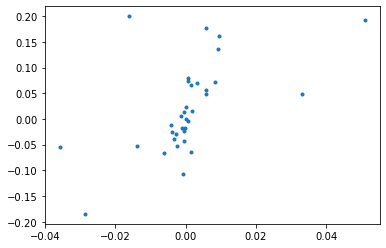

In [22]:
plt.plot(crosswalk_sorted.dTs_Rnet_avgs.values[2:], crosswalk_sorted.dTs_actual_avgs.values[2:],'.')

<xarray.DataArray (lat: 96, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat           (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
  * lon           (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    ensemble_key  <U8 'OFFL0012'

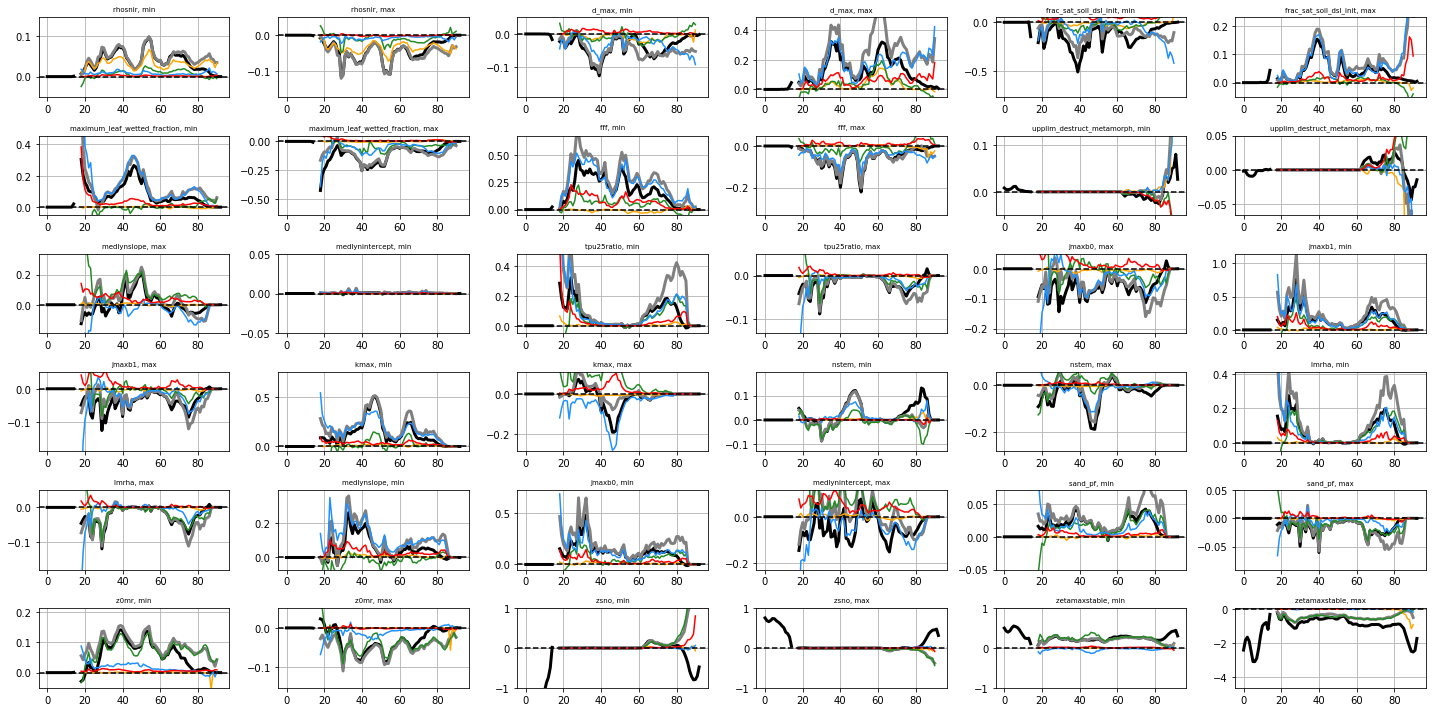

In [307]:
plt.figure(figsize=(20,10))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    plt.plot(dTs_actual_avgs[:,:,i].mean(dim='lon'),color='k',linewidth=3, label='Actual')
    plt.plot(dTs_est_avgs[:,:,i].mean(dim='lon'),color='gray',linewidth=3, label='Actual')
    plt.plot(dTs_Rnet_avgs[:,:,i].mean(dim='lon'),color='orange', label='from Rnet')
    plt.plot(dTs_ra_avgs[:,:,i].mean(dim='lon'),color='forestgreen', label='from ra')
    plt.plot(dTs_rs_avgs[:,:,i].mean(dim='lon'),color='dodgerblue', label='from rs')
    plt.plot(error_avgs[:,:,i].mean(dim='lon'),color='red', label='error')
    if i in [32, 33,34]:
        ymin=-1
        ymax=1
    else:
        ymax=np.nanmax(dTs_actual_avgs[:,:,i].mean(dim='lon'))*1.5
        ymax=np.nanmax([ymax, 0.05])
        ymin=np.nanmin([-0.05, np.nanmin(dTs_actual_avgs[:,:,i].mean(dim='lon'))*1.5])
    plt.ylim([ymin, ymax])
    plt.title(crosswalk.description.values[i],fontsize=7)
    
    plt.axhline(y=0,linestyle='--',color='k')
    plt.grid()
    #plt.axvline(x=0,linestyle='--',color='k')
    
plt.tight_layout()

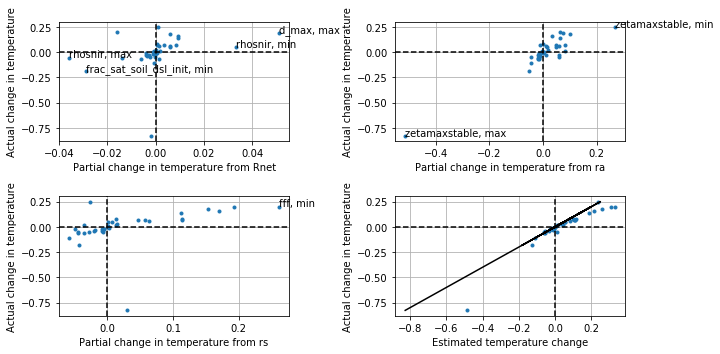

In [239]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
x=(dTs_Rnet_avgs*landweights_not60).mean(dim=['lat','lon'])
y=(dTs_actual_avgs*landweights_not60).mean(dim=['lat','lon'])
plt.plot(x,y,'.')
plt.xlabel('Partial change in temperature from Rnet')
plt.ylabel('Actual change in temperature')
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
#plt.plot(y,y,'-k')
for i,desc in enumerate(crosswalk.description.values):
    if np.abs(x[i])>0.02:
        plt.text(x[i],y[i],desc)

plt.subplot(2,2,2)
x=(dTs_ra_avgs*landweights_not60).mean(dim=['lat','lon'])
y=(dTs_actual_avgs*landweights_not60).mean(dim=['lat','lon'])
plt.plot(x,y,'.')
plt.xlabel('Partial change in temperature from ra')
plt.ylabel('Actual change in temperature')
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
#plt.plot(y,y,'-k')
for i,desc in enumerate(crosswalk.description.values):
    if np.abs(x[i])>0.1:
        plt.text(x[i],y[i],desc)
        

plt.subplot(2,2,3)
x=(dTs_rs_avgs*landweights_not60).mean(dim=['lat','lon'])
y=(dTs_actual_avgs*landweights_not60).mean(dim=['lat','lon'])
plt.plot(x,y,'.')
plt.xlabel('Partial change in temperature from rs')
plt.ylabel('Actual change in temperature')
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
#plt.plot(y,y,'-k')
for i,desc in enumerate(crosswalk.description.values):
    if np.abs(x[i])>0.2:
        plt.text(x[i],y[i],desc)
        

plt.subplot(2,2,4)
x=(dTs_est_avgs*landweights_not60).mean(dim=['lat','lon'])
y=(dTs_actual_avgs*landweights_not60).mean(dim=['lat','lon'])
plt.plot(x,y,'.')
plt.xlabel('Estimated temperature change')
plt.ylabel('Actual change in temperature')
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.plot(y,y,'-k')

plt.tight_layout()

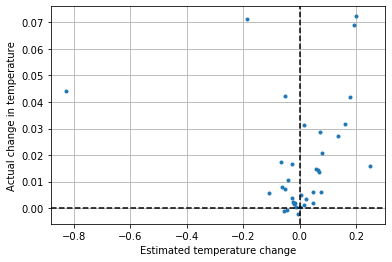

In [243]:
x=(dTs_actual_avgs*landweights_not60).mean(dim=['lat','lon'])
y=(error_avgs*landweights_not60).mean(dim=['lat','lon'])
plt.plot(x,y,'.')
plt.xlabel('Estimated temperature change')
plt.ylabel('Actual change in temperature')
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')

# Look at one ensemble member

### Load data

In [309]:
input_dir='/glade/work/czarakas/Lague_kernels/TRM/'

In [310]:
key_short='OFFL0021'
key=key_short+'_PI_v02'
desc=(crosswalk.description.values[(crosswalk.key_landonlyPPE.values==key_short)])[0]
print(desc)

delta_Rnet_avg=xr.open_dataset(input_dir+'delta_Rnet_avg.'+key+'.nc')['delta_Rnet_avg']
delta_ra_avg=xr.open_dataset(input_dir+'delta_ra_avg.'+key+'.nc')['delta_ra_avg']
delta_rs_avg=xr.open_dataset(input_dir+'delta_rs_avg.'+key+'.nc')['delta_rs_avg']
delta_Ts_avg=xr.open_dataset(input_dir+'delta_Ts_avg.'+key+'.nc')['delta_Ts_avg']
dTs_Rnet_avg=xr.open_dataset(input_dir+'dTs_Rnet_avg.'+key+'.nc')['dTs_Rnet_avg']
dTs_ra_avg=xr.open_dataset(input_dir+'dTs_ra_avg.'+key+'.nc')['dTs_ra_avg']
dTs_rs_avg=xr.open_dataset(input_dir+'dTs_rs_avg.'+key+'.nc')['dTs_rs_avg']
dTs_est_avg=xr.open_dataset(input_dir+'dTs_est_avg.'+key+'.nc')['dTs_est_avg']
dTs_actual_avg=xr.open_dataset(input_dir+'dTs_actual_avg.'+key+'.nc')['dTs_actual_avg']
error_avg=xr.open_dataset(input_dir+'error_avg.'+key+'.nc')['error_avg']

tpu25ratio, min


### Plot figures

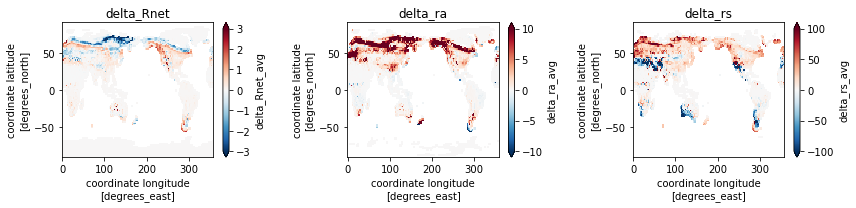

In [314]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
delta_Rnet_avg.plot(vmax=3)
plt.title('delta_Rnet')
plt.subplot(1,3,2)
delta_ra_avg.plot(vmin=-10, vmax=10, cmap=plt.cm.RdBu_r)
plt.title('delta_ra')
plt.subplot(1,3,3)
delta_rs_avg.plot(vmin=-100, vmax=100, cmap=plt.cm.RdBu_r)
plt.title('delta_rs')
plt.tight_layout()

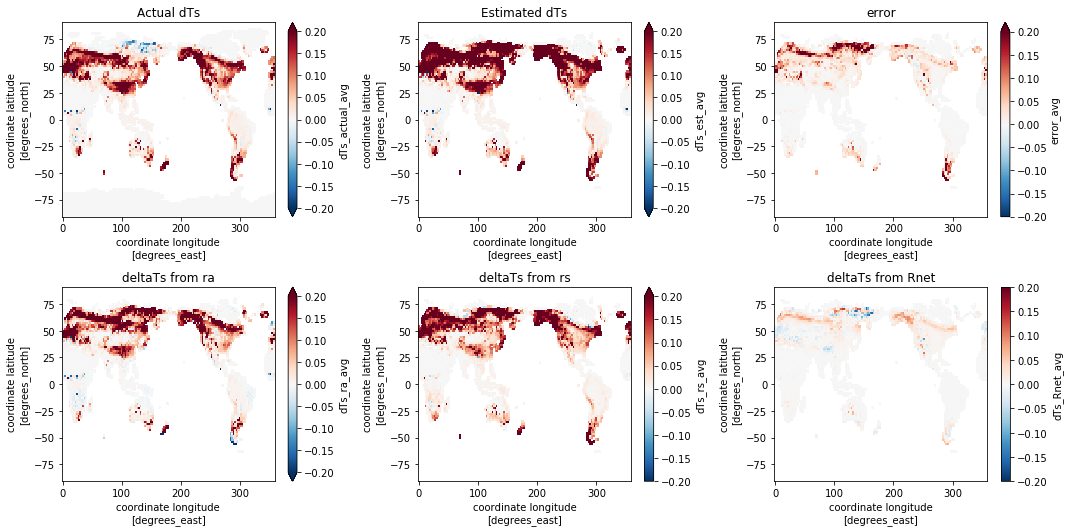

In [315]:
vmax=0.2
vmin=-vmax
plt.figure(figsize=(15,7.5))
plt.subplot(2,3,1)
dTs_actual_avg.plot(vmin=vmin, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.title('Actual dTs')

plt.subplot(2,3,2)
dTs_est_avg.plot(vmin=vmin, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.title('Estimated dTs')

plt.subplot(2,3,6)
dTs_Rnet_avg.plot(vmin=vmin, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.title('deltaTs from Rnet')

plt.subplot(2,3,4)
dTs_ra_avg.plot(vmin=vmin, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.title('deltaTs from ra')

plt.subplot(2,3,5)
dTs_rs_avg.plot(vmin=vmin, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.title('deltaTs from rs')

plt.subplot(2,3,3)
error_avg.plot(vmin=vmin, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.title('error')

plt.tight_layout()
plt.savefig(key+'_attribution_maps.png')

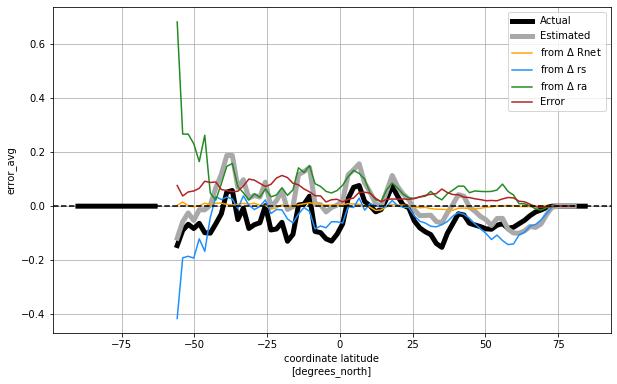

In [175]:
plt.figure(figsize=(10,6))
#plt.ylim([-0.1, 0.4])
dTs_actual_avg.groupby('lat').mean(dim='lon').plot(color='k', label='Actual',linewidth=5)
dTs_est_avg.groupby('lat').mean(dim='lon').plot(color='darkgray', label='Estimated',linewidth=5)
dTs_Rnet_avg.groupby('lat').mean(dim='lon').plot(color='orange', label='from $\Delta$ Rnet')
dTs_rs_avg.groupby('lat').mean(dim='lon').plot(color='dodgerblue', label='from $\Delta$ rs')
dTs_ra_avg.groupby('lat').mean(dim='lon').plot(color='forestgreen', label='from $\Delta$ ra')
error_avg.groupby('lat').mean(dim='lon').plot(color='firebrick', label='Error')
#dTs_secondorder_avg.groupby('lat').mean(dim='lon').plot(color='aqua', label='Error')
plt.axhline(y=0,linestyle='--',color='k')
plt.legend()

plt.grid()

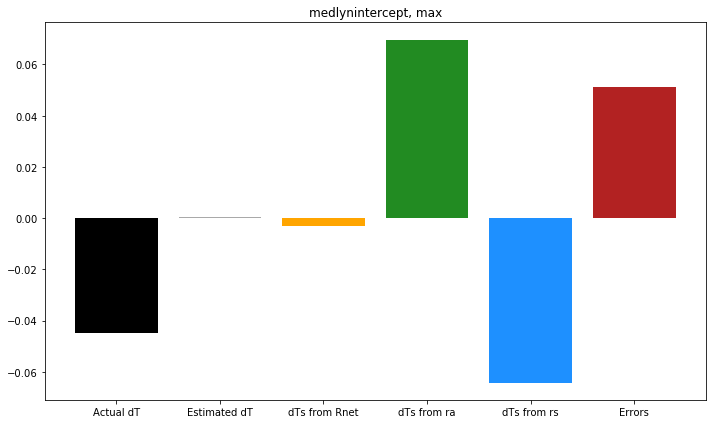

In [176]:
labels = ['Actual dT', 'Estimated dT', 'dTs from Rnet', 'dTs from ra', 'dTs from rs', 'Errors']
colors = ['black', 'darkgrey', 'orange', 'forestgreen', 'dodgerblue', 'firebrick']
dTs_array = [(landweights*dTs_actual_avg).mean(dim=['lat','lon']).values,
            (landweights*dTs_est_avg).mean(dim=['lat','lon']).values,
            (landweights*dTs_Rnet_avg).mean(dim=['lat','lon']).values,
            (landweights*dTs_ra_avg).mean(dim=['lat','lon']).values,
            (landweights*dTs_rs_avg).mean(dim=['lat','lon']).values,
            (landweights*error_avg).mean(dim=['lat','lon']).values]

plt.figure(figsize=(10,6))
plt.bar(labels,dTs_array,color=colors)
plt.title(desc)
plt.savefig(key+'_attribution.png')
plt.tight_layout()

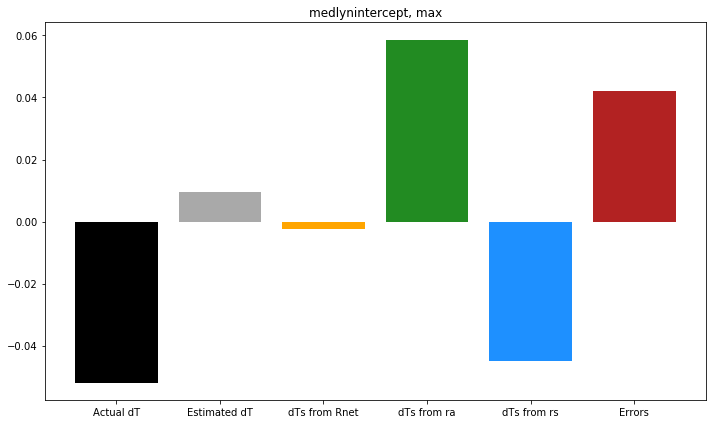

In [177]:
dTs_array = [(landweights_not60*dTs_actual_avg).mean(dim=['lat','lon']).values,
            (landweights_not60*dTs_est_avg).mean(dim=['lat','lon']).values,
            (landweights_not60*dTs_Rnet_avg).mean(dim=['lat','lon']).values,
            (landweights_not60*dTs_ra_avg).mean(dim=['lat','lon']).values,
            (landweights_not60*dTs_rs_avg).mean(dim=['lat','lon']).values,
            (landweights_not60*error_avg).mean(dim=['lat','lon']).values]

plt.figure(figsize=(10,6))
plt.bar(labels,dTs_array,color=colors)
plt.title(desc)
#plt.savefig(key+'_attribution.png')
plt.tight_layout()